# Image Visualization

In [2]:
# Image i/p and o/p
import cv2
import matplotlib.pyplot as plt

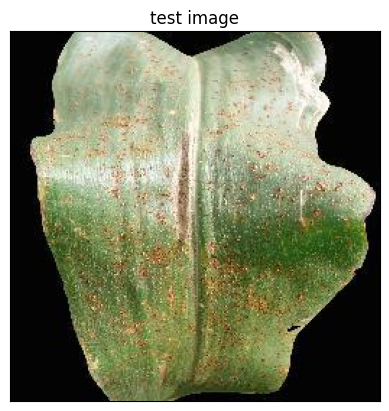

In [28]:
image_path = r"Plant-Disease-Detection/artifacts/test_img/CornCommonRust2.JPG"
# Reading Image
img = cv2.imread(image_path) 
# Following is in BGR format which we have to convert into RGB
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # This will create image from BGR to RGB format
# Display Image
plt.imshow(rgb_img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Image

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [11]:
trained_model = keras.models.load_model("Plant-Disease-Detection/model.keras")

In [12]:
trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_95 (Ba  (None, 256)               1

In [29]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (228,228))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
# As our model is trained on batches so it will be expecting shape (N-->images in batch,(input_image shape))
input_arr = np.array([input_arr]) # To convert single image to batch
print(input_arr.shape)
predictions = trained_model.predict(input_arr)
predictions, predictions.shape

(1, 228, 228, 3)
1/1 [==============================] - 0s 116ms/step


(array([[5.93990413e-03, 4.16186958e-04, 6.55688418e-05, 2.86258728e-05,
         9.55911295e-04, 1.46888387e-05, 2.70743755e-07, 8.33210535e-03,
         9.80984807e-01, 6.22034349e-05, 6.81107485e-05, 4.42154288e-07,
         3.09155598e-06, 5.29079898e-07, 2.34114964e-06, 3.13177088e-06,
         1.10248120e-05, 9.96057715e-05, 7.80231494e-04, 1.02753052e-03,
         3.69476591e-04, 1.62008801e-05, 1.67678154e-04, 1.25367405e-05,
         4.97978499e-06, 9.17521174e-05, 5.22637783e-05, 4.14705755e-05,
         8.94831942e-07, 3.53814539e-05, 2.93477438e-04, 1.39944168e-05,
         1.52427192e-05, 1.36885853e-06, 3.79899393e-05, 3.74969943e-07,
         2.92698860e-05, 1.93514170e-05]], dtype=float32),
 (1, 38))

In [18]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [30]:
# Show predicted output
result_index = np.argmax(predictions)
result_index
model_prediction = class_name[result_index]


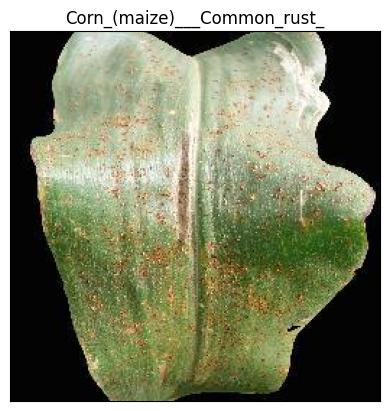

In [31]:
plt.imshow(rgb_img)
plt.title(model_prediction)
plt.xticks([])
plt.yticks([])
plt.show()